In [8]:
%load_ext autoreload
%autoreload 2

from Shared.shared import *

sim_folder = "sim_output/Dopri5_1k"

@chex.dataclass
class Primordial():

    # Momenta of the Cl maps
    Cl_qs = jnp.geomspace(0.01, 100, 50)

    # Select index closest to desired q value
    q_select = 3.15
    Cl_qi = jnp.abs(Cl_qs - q_select).argmin()
    # print(f"closest q value to {q_select} in log spaced array is {Cl_qs[Cl_qi]}")

    # Temperature perturbations, in micro Kelvin
    uK = 1e-6*Params.K    # micro Kelvin
    Nside = 8
    Npix = hp.nside2npix(Nside)

    T_CNB_z4 = Params.T_CNB*(1+4)


def healpix_side_by_side(map_left, map_right, dict_left, dict_right, args):

    fig = plt.figure(figsize=(12, 4.4))
    fig.tight_layout()

    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    # Remove all ticks, labels and frames, to only show mollview plot.
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.get_xaxis().set_ticks([])
    ax1.get_yaxis().set_ticks([])
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.get_xaxis().set_ticks([])
    ax2.get_yaxis().set_ticks([])

    hp.newvisufunc.projview(
        map_left,
        **dict_left,
        **args.healpy_dict)

    hp.newvisufunc.projview(
        map_right,
        **dict_right,
        **args.healpy_dict)
    
    plt.show(); plt.close()


def momentum_distribution(y_arr, nbins, args):
    """
    Plot a momentum histogram with logarithmically spaced bins.
    """

    # Generating logarithmically spaced bins
    log_bins = np.logspace(
            np.log10(np.min(y_arr)), np.log10(np.max(y_arr)), nbins)

    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Plot simulation distances
    ax.hist(
        y_arr, bins=log_bins, 
        color="blue", label="CNB simulation", alpha=0.8)
    
    ax.set_xscale("log")
    ax.set_title("Momentum distribution at z=4 (Log Bins)")
    ax.set_xlabel(r"$p_\mathrm{back}/T_\mathrm{CNB,0}$")
    ax.set_ylabel("Nr. of neutrinos")
    ax.legend(loc="upper left")

    plt.show(); plt.close()


def cartesian_to_healpix(Nside_map, xyz_pos_in, obs_pos_in):

    # Center on observer position.
    xyz_pos = xyz_pos_in - obs_pos_in
    x, y, z = xyz_pos[:,0], xyz_pos[:,1], xyz_pos[:,2]

    # Convert x,y,z to angles.
    proj_xy_plane_dis = np.sqrt(x**2 + y**2)

    thetas = np.arctan2(z, proj_xy_plane_dis)
    phis = np.arctan2(y, x)

    # To galactic latitude and longitude (in degrees) for healpy.
    hp_glon, hp_glat = np.rad2deg(phis), np.rad2deg(thetas)

    # Convert angles to pixel indices using ang2pix.
    pixel_indices = hp.ang2pix(
            Nside_map, hp_glon, hp_glat, lonlat=True)

    # Create a Healpix map and increment the corresponding pixels
    healpix_map = np.zeros(hp.nside2npix(Nside_map))
    np.add.at(healpix_map, pixel_indices, 1)

    return pixel_indices, healpix_map

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Momentum distributions

#? are the highest momenta affected by gravity? If yes how much?
5
[0.00254008 0.00254034 0.00254059 0.00254085 0.0025411 ]
very little difference!

#? are the lowest momenta affected by gravity? If yes how much?
5
[0.0906421  0.00970491 0.05594086 0.07963327 0.07719657]
more than 1 order of magnitude bigger difference than for higher momenta!

**************************************
Momentum endpoints for Cl(q) generation:
Min = 0.00011548905466971429 T_CNB ; Max = 13.290678657202637 T_CNB
**************************************

Maximum momentum for Fermi-Dirac sampling = 13.2860 [T_CNB]



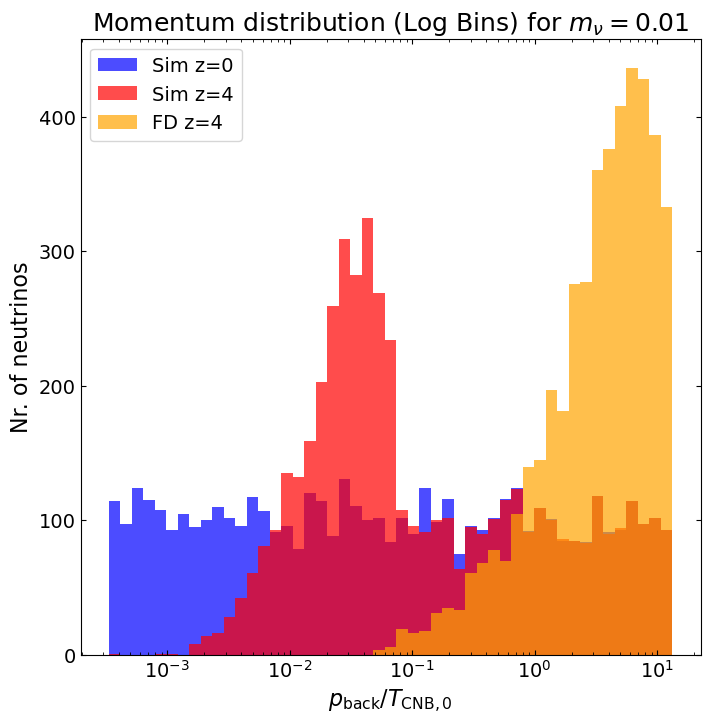

#? are the highest momenta affected by gravity? If yes how much?
5
[0.01270039 0.01270168 0.01270296 0.01270423 0.01270548]
very little difference!

#? are the lowest momenta affected by gravity? If yes how much?
5
[0.45321048 0.04852455 0.27970429 0.39816633 0.38598286]
more than 1 order of magnitude bigger difference than for higher momenta!

**************************************
Momentum endpoints for Cl(q) generation:
Min = 0.0005774452733485714 T_CNB ; Max = 66.4533932860132 T_CNB
**************************************

Maximum momentum for Fermi-Dirac sampling = 66.4299 [T_CNB]



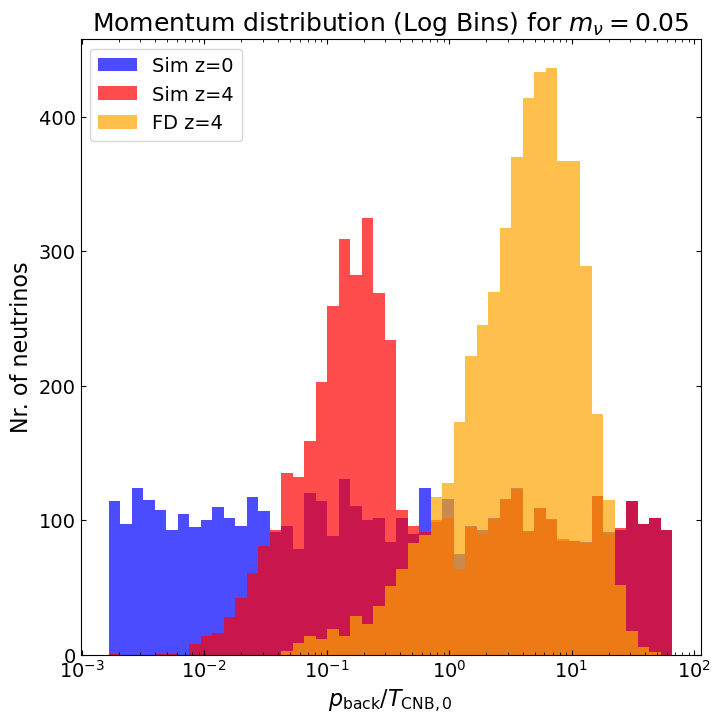

#? are the highest momenta affected by gravity? If yes how much?
5
[0.02540077 0.02540336 0.02540592 0.02540845 0.02541096]
very little difference!

#? are the lowest momenta affected by gravity? If yes how much?
5
[0.90642096 0.09704911 0.55940859 0.79633266 0.77196572]
more than 1 order of magnitude bigger difference than for higher momenta!

**************************************
Momentum endpoints for Cl(q) generation:
Min = 0.0011548905466971428 T_CNB ; Max = 132.9067865720264 T_CNB
**************************************

Maximum momentum for Fermi-Dirac sampling = 132.8598 [T_CNB]



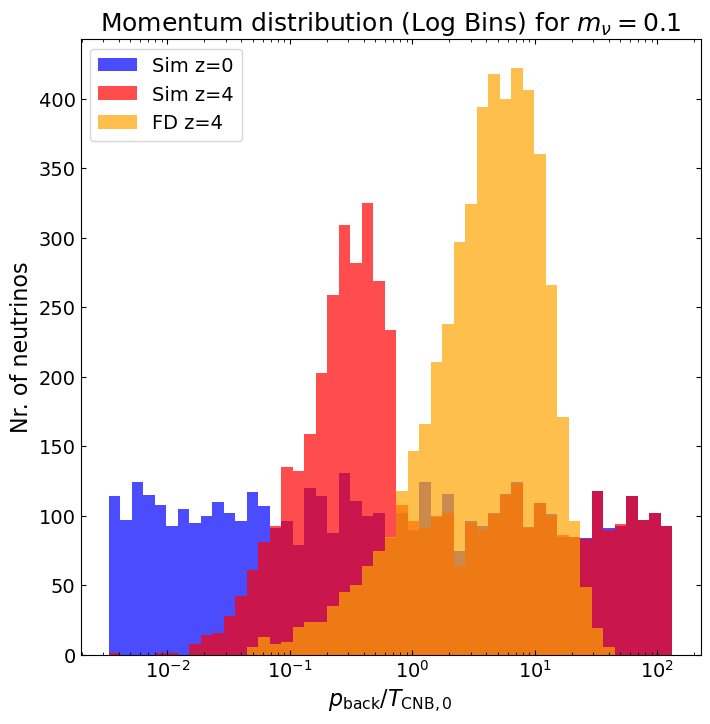

#? are the highest momenta affected by gravity? If yes how much?
5
[0.07620232 0.07621008 0.07621775 0.07622535 0.07623287]
very little difference!

#? are the lowest momenta affected by gravity? If yes how much?
5
[2.71926289 0.29114732 1.67822577 2.38899797 2.31589716]
more than 1 order of magnitude bigger difference than for higher momenta!

**************************************
Momentum endpoints for Cl(q) generation:
Min = 0.003464671640091428 T_CNB ; Max = 398.72035971607914 T_CNB
**************************************

Maximum momentum for Fermi-Dirac sampling = 398.5794 [T_CNB]



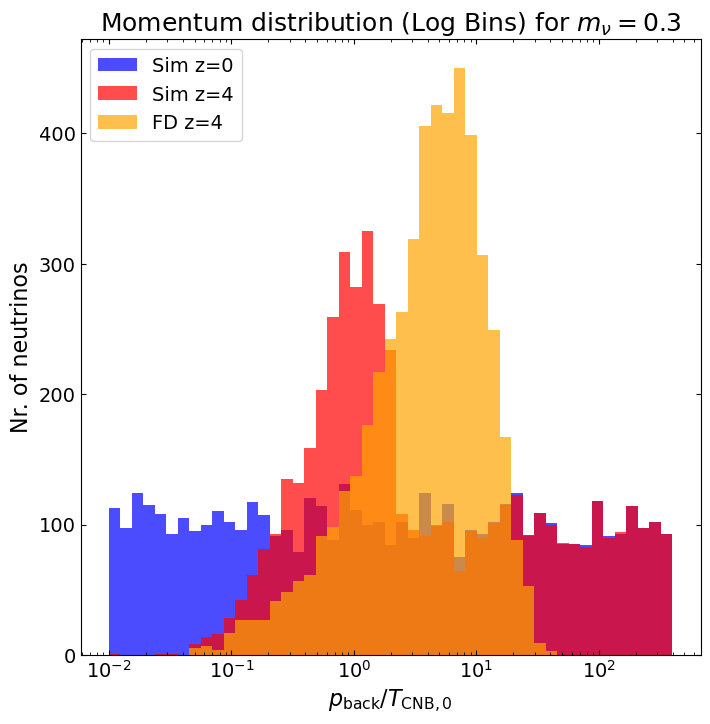

In [2]:
# Load neutrino vectors for specified halo
halo = 1
nu_vectors = jnp.load(f'{sim_folder}/neutrino_vectors_numerical_halo{halo}_all_sky.npy')

# Neutrino masses
nu_masses = jnp.array([0.01, 0.05, 0.1, 0.3])*Params.eV

# Convert to momenta
v_arr = nu_vectors[...,3:]
p_arr, y_arr = Physics.velocities_to_momenta(v_arr, nu_masses, Params())


for m_idx in range(4):

    # Set up plot parameters
    #? Changing the mass changes the FD momenta a lot, not seen in plot for m_idx=3
    z0_y_arr = y_arr[m_idx,:,0]
    z4_y_arr = y_arr[m_idx,:,-1]/(1+4)
    nbins = 50

    # Generating logarithmically spaced bins
    log_bins = np.logspace(
            np.log10(np.min(z0_y_arr)), np.log10(np.max(z0_y_arr)), nbins)

    fig = plt.figure()
    ax = fig.add_subplot(111)


    print('#? are the highest momenta affected by gravity? If yes how much?')
    last_x = 5
    print(jnp.count_nonzero(jnp.abs(z0_y_arr[-last_x:] - z4_y_arr[-last_x:])))
    print(jnp.abs(z0_y_arr[-last_x:] - z4_y_arr[-last_x:]))
    print('very little difference!\n')

    print('#? are the lowest momenta affected by gravity? If yes how much?')
    first_x = 5
    print(jnp.count_nonzero(jnp.abs(z0_y_arr[:first_x] - z4_y_arr[:first_x])))
    print(jnp.abs(z0_y_arr[:first_x] - z4_y_arr[:first_x]))
    print('more than 1 order of magnitude bigger difference than for higher momenta!\n')


    print("**************************************")
    print("Momentum endpoints for Cl(q) generation:")
    print(f"Min = {jnp.min(z4_y_arr)} T_CNB ; Max = {jnp.max(z4_y_arr)} T_CNB")
    print("**************************************\n")


    # Sample Fermi-Dirac momenta
    samples = 5_000
    max_p = jnp.max(z0_y_arr*Params.T_CNB)
    print(f"Maximum momentum for Fermi-Dirac sampling = {max_p/Params.T_CNB:.4f} [T_CNB]\n")
    FD_momenta_z0 = Physics.sample_Fermi_Dirac_momentum(
        N=samples, T=Params.T_CNB, p_norm=max_p)
    # p_norm is the maximum momentum sampled, and is used for normalization

    FD_momenta_z4 = FD_momenta_z0*(1+4)

    # Randomly draw from simulation momenta, to match number of Fermi-Dirac samples
    z0_y_sync = jax.random.choice(Params.key, z0_y_arr, shape=(samples,), replace=False)
    z4_y_sync = jax.random.choice(Params.key, z4_y_arr, shape=(samples,), replace=False)

    # Plot momenta
    ax.hist(z0_y_sync, bins=log_bins, color="blue", label="Sim z=0", alpha=0.7)
    ax.hist(z4_y_sync, bins=log_bins, color="red", label="Sim z=4", alpha=0.7)
    ax.hist(FD_momenta_z4/Params.T_CNB, bins=log_bins, color="orange", label="FD z=4", alpha=0.7)

    ax.set_xscale("log")
    ax.set_title(rf"Momentum distribution (Log Bins) for $m_{{\nu}}={nu_masses[m_idx]}$")
    ax.set_xlabel(r"$p_\mathrm{back}/T_\mathrm{CNB,0}$")
    ax.set_ylabel("Nr. of neutrinos")
    ax.legend(loc="upper left")

    plt.show(); plt.close()

## Sky-maps and power spectra

In [7]:
def primordial_fluctuations_1_halo(sim_folder, z, halo, m_idx, args):

    with open(f"{sim_folder}/sim_parameters.yaml", "r") as file:
        sim_setup = yaml.safe_load(file)

    Nside = sim_setup["Nside"]
    Npix = sim_setup["Npix"]
    p_num = sim_setup["momentum_num"]

    uK = 1e-6*args.K

    # Load temperature fluctuations
    Delta_matrix = jnp.array(
        [jnp.load(f"Data/Deltas/Delta_arr_Nside{Nside}_Cl_q{qi}_z{z}.npy") for qi in range(50)])
    Delta_matrix *= uK/(args.T_CNB * (1+z))
    # (50, 768)

    # Delta_matrix = jnp.zeros_like(Delta_matrix)

    # Load neutrino vectors from simulation
    nu_vectors = jnp.load(f'{sim_folder}/vectors_halo{halo}.npy')
    # (768000, 2, 6)

    # Corresponding healpix indices for each neutrino initial direction
    pix_indices = jnp.load(f"Data/pix_indices.npy")

    # Neutrino masses
    nu_masses = jnp.array([0.01, 0.05, 0.1, 0.3])*args.eV

    # Convert to momenta
    v_arr = nu_vectors[...,3:]
    p_arr, y_arr = Physics.velocities_to_momenta(v_arr, nu_masses, Params())
    # (4, 768000, 2)

    # Momenta at z=0 and z=4
    p_arr_z0 = p_arr[m_idx,:,0]
    p_arr_z4 = p_arr[m_idx,:,-1]

    q_arr_z0 = y_arr[m_idx,:,0]
    q_arr_z4 = y_arr[m_idx,:,-1] / (1+z)  #? y_arr in terms of T_CNB(z=0) or T_CNB(z=4) ?

    # Find indices to match neutrino momenta to Cl momenta
    q_indices = jnp.abs(Primordial.Cl_qs[None, :] - q_arr_z4[:, None]).argmin(axis=-1)
    ic(q_indices.shape)

    # Select corresponding pixels, i.e. temp. perturbations, for all neutrinos
    nu_Deltas = Delta_matrix[q_indices, pix_indices]
    ic(nu_Deltas.shape)

    # Reshaping
    nu_Delta_blocks = nu_Deltas.reshape(Npix, p_num)
    q_blocks_z0 = q_arr_z0.reshape(Npix, p_num)
    q_blocks_z4 = q_arr_z4.reshape(Npix, p_num)
    p_blocks_z0 = p_arr_z0.reshape(Npix, p_num)
    p_blocks_z4 = p_arr_z4.reshape(Npix, p_num)

    # Left skymap (overdensities)
    pix_sr = 4*Params.Pi/Npix
    n_cm3_all_sky = Physics.number_density_Delta(p_blocks_z0, p_blocks_z4, nu_Delta_blocks, pix_sr, Params())
    map_left = n_cm3_all_sky / (Params.N0/Primordial.Npix/(1/Params.cm**3))
    ic(n_cm3_all_sky.shape, jnp.sum(n_cm3_all_sky))

    # Right skymap (primordial temp. perturbations)    
    map_right = Delta_matrix[Primordial.Cl_qi,:]

    dict_left = dict(
        title=r'Overdensities of $m_\nu=0.05$ eV at z=0', 
        unit=r'$n_{\nu, pix} / n_{\nu, pix, 0}$',
        cmap='coolwarm',
        override_plot_properties={"cbar_pad": 0.1},
        sub=121)

    dict_right = dict(
        title=fr'Temp. fluctuations of $m_\nu=0.05$ eV at z={z} for q~3.15', 
        unit=r'$\delta T_\nu / T_\nu \,\, (z=4)$',
        cmap='inferno',
        sub=122)

    healpix_side_by_side(
        map_left, map_right, dict_left, dict_right, Params)


    #####################
    ### Power spectra ###
    #####################

    # note: healpy needs numpy arrays apparently, jax arrays give errors

    # Unit to compare to similar figures in literature.
    micro_Kelvin_unit = 1e12

    # Convert maps of neutrino densities to temperatures.
    temperature_map = jnp.cbrt((map_left*2*Params.Pi**2)/(3*zeta(3)))

    # Compute power spectrum of temperature all-sky map.
    cl = hp.sphtfunc.anafast(np.array(temperature_map))
    ell = jnp.arange(len(cl))
    power_spectrum = ell*(ell+1)*cl/(2*Params.Pi)*micro_Kelvin_unit

    # Compute cross-correlation spectrum of n_nu and DM maps.
    cross = hp.sphtfunc.anafast(np.array(temperature_map), np.array(map_right))
    cross_power_spectrum = ell*(ell+1)*cross/(2*Params.Pi)*micro_Kelvin_unit

    fig = plt.figure(figsize =(12, 4))
    fig.tight_layout()

    ax1 = fig.add_subplot(121)
    ell = jnp.arange(len(cl))
    ax1.semilogy(ell, power_spectrum)
    ax1.set_xlabel(r"$\ell$")
    ax1.set_xlim(1,)
    ax1.set_ylim(1e4,1e12)
    ax1.set_ylabel(r"$\ell(\ell+1)C_{\ell}$")
    ax1.grid()

    ax2 = fig.add_subplot(122)
    ell = jnp.arange(len(cross))
    ax2.plot(ell, cross_power_spectrum)
    ax2.set_xlabel(r"$\ell$")
    ax2.set_ylabel(r"$\ell(\ell+1)C_{\ell}$")
    ax2.grid()

    plt.show(); plt.close()



primordial_fluctuations_1_halo(
    sim_folder=sim_folder,
    z=4,
    halo=3,  # 1 to 30 expect 20, 24, 25
    m_idx=2,  # 0=0.01, 1=0.05, 2=0.1, 3=0.3 (eV neutrino mass)
    args=Params)

ValueError: Incompatible shapes for broadcasting: shapes=[(1, 768, 1000, 2), (4, 1, 1)]

## Number density plots

In [ ]:
exclude_nums = [20]
nu_vectors = jnp.array([
    jnp.load(f'{sim_folder}/neutrino_vectors_numerical_halo{i+1}_all_sky.npy')
    for i in range(5) if i+1 not in exclude_nums])
ic(nu_vectors.shape)

In [ ]:
nu_mass_range = jnp.load(f"{sim_folder}/neutrino_massrange_eV.npy")

for halo_i in range(5):

    nu_vectors = jnp.load(f'{sim_folder}/neutrino_vectors_numerical_halo{halo_i+1}_all_sky.npy')

    Physics.number_densities_mass_range(
        v_arr=nu_vectors[...,3:], 
        m_arr=nu_mass_range, 
        pix_sr=4*Params.Pi,
        out_path=f"{sim_folder}/densities_halo_{halo_i+1}.npy", 
        args=Params())

In [ ]:
dens_test = jnp.load(f"{sim_folder}/densities_halo_1.npy")
ic(dens_test.shape)
nu_densities = dens_test[None,...]

ic| nu_densities.shape: (5, 100)
ic| etas.shape: (5, 100)


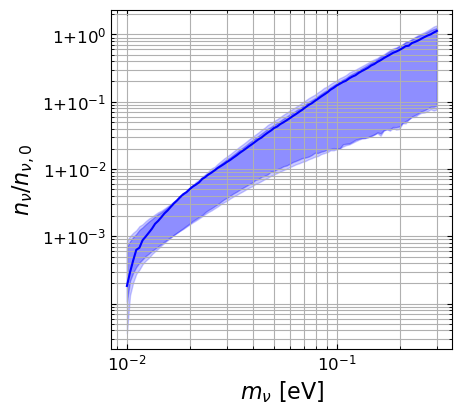

In [ ]:
# exclude_nums = [20]
# nu_densities = jnp.array([
#     jnp.load(f'{sim_folder}/number_densities_numerical_halo{i+1}_all_sky.npy')
#     for i in range(30) if i+1 not in exclude_nums])
# ic(nu_densities.shape)

nu_densities = jnp.array([
    jnp.load(f'{sim_folder}/densities_halo_{i+1}.npy')
    for i in range(5)])
ic(nu_densities.shape)

etas = nu_densities / (Params.N0/(1/Params.cm**3))
ic(etas.shape)

etas_median = np.median(etas, axis=0)
etas_perc2p5 = np.percentile(etas, q=2.5, axis=0)
etas_perc97p5 = np.percentile(etas, q=97.5, axis=0)
etas_perc16 = np.percentile(etas, q=16, axis=0)
etas_perc84 = np.percentile(etas, q=84, axis=0)


fig = plt.figure(figsize=(4.4, 4.4))
fig.tight_layout()

ax = fig.add_subplot(111)

ax.plot(
    nu_mass_range, (etas_median-1), color='blue', 
    label='box halos (median)')
ax.fill_between(
    nu_mass_range, (etas_perc2p5-1), (etas_perc97p5-1), 
    color='blue', alpha=0.2, 
    label='2.5-97.5 % C.L.')
ax.fill_between(
    nu_mass_range, (etas_perc16-1), (etas_perc84-1), 
    color='blue', alpha=0.3, 
    label='16-84 % C.L.')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$m_{\nu}$ [eV]', fontsize=16)
ax.set_ylabel(r'$n_{\nu} / n_{\nu, 0}$', fontsize=16)
ax.tick_params(axis='both', labelsize=12)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(Utils.y_format_etas))
plt.grid(True, which="both", ls="-")